<h1><center> Solvers </center></h1>

<img src="/files/Documents/Semestre%20VI/Semillero/Solvers/logo_sympy.png">

En este módulo se hará uso de la libreria Sympy para resolver ecuaciones o sistemas de ecuaciones de diversos tipos. Se tomarán las aplicaciones más útiles para el campo de la ingeniería. Si se desea profundizar ir al siguiente link: http://docs.sympy.org/latest/modules/solvers/solvers.html ahí se tendrán casos más detallados para problemas más específicos.


<h1> Ecuaciones Algebráicas </h1>

Las ecuaciones algebráicas son aquellos polinomios que se igualan a cero. Generalmente se manejan polinomios de primer o segundo grado, es decir, cuyas variables están elevadas a la unidad o al cuadrado.




In [11]:
from sympy import Symbol, solve, sin
import numpy as np
import math

x = Symbol("x")

sol_1 = solve(x**2 - 4, x)

print sol_1

#Podemos definir también una función y resolverla.

def y(x):
    return -15 + 5*x

sol_2 = solve(y(x))

print sol_2






[-2, 2]
[3]


La solución que obtenemos, como sabemos, son las raíces de la ecuación, ya que es en ese valor donde la curva de la función corta el eje x, en caso de tener una función de tipo $f(x) = x$. Para demostrar lo anterior podemos graficar dichas funciones.

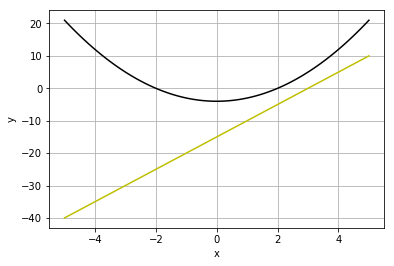

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,100)
plt.plot(x,x**2 - 4, color="k")
plt.plot(x,-15 + 5*x, color="y")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Como vemos, hay funciones que tienes dos soluciones, si queremos sólo la positiva o sólo la negativa, podemos hacer lo siguiente.

In [13]:
x_pos = Symbol("x_pos", positive=True)
solve(x_pos**2 - 4)

[2]

In [14]:
x_neg = Symbol("x_neg", negative=True)
solve(x_neg**2 - 4)

[-2]

La solución no debe ser numérica, también se pueden despejar símbolos.

In [5]:
from sympy.abc import x, y, z, a, b, c

sol_1 = solve(x - y**2, x)

#Tambien podemos despejar y de la misma ecuación

sol_2 = solve(x - y**2, y)

print "sol_1 = ", sol_1
print "sol_2 = ", sol_2

sol_1 =  [y**2]
sol_2 =  [-sqrt(x), sqrt(x)]


Podemos tener un ecuación con constantes y después evaluarlas con solve.

In [6]:
sol_3 = solve((a + b)*x**3 - 4*b + 3 , a, b)

print sol_3

{b: 3/4, a: -3/4}


<h2> Sistemas de Ecuaciones </h2>

Sympy no sólo resuelve ecuaciones, también sistemas de ecuaciones, en este caso lineales.

In [7]:
from sympy import Matrix, solve_linear_system
from sympy.abc import x, y

x +  3*y == 0 #No afectan la operación, se pueden escribir en #

x +  5*y == 7 #Deben estar en la forma a*x + b*y = c

system = Matrix([[1,3,0],[1,5,7]])

solve_linear_system(system, x, y)

{x: -21/2, y: 7/2}

Podemos usar otras librerías para resolver un sistema de ecuaciones, como Numpy.

In [8]:
import numpy as np

x +  3*y == 0 #No afectan la operación, se pueden escribir en #

x +  5*y == 7 

coef = np.array([[1,3],[1,5]]) #Matriz de coeficientes

ti = np.array([0,7]) #Matriz terminos independientes

solution = np.linalg.solve(coef, ti)

print solution

[-10.5   3.5]


Se pueden resolver sistemas de ecuaciones lineales de más de dos variables. Para esto debemos usar otro método qque hace parte de los solvers de Sympy.

In [9]:
from sympy import Matrix
from sympy.abc import x, y, z
from sympy.solvers.solvers import solve_linear_system_LU

#x +  3*y + 6*z == 0 #No afectan la operación, se pueden escribir en #

#x +  5*y - 8*z == 7 #Deben estar en la forma a*x + b*y + c*z = d

#3*x + y + 9*z == 5 

solve_linear_system_LU(Matrix([
    [1,2,0,1],
    [3,2,2,1],
    [2,0,0,1]]),[x, y, z] )

{x: 1/2, z: -1/2, y: 1/4}

<h2>Ejemplo</h2>

Un cliente de un supermercado ha pagado un total de 156 € por 24 l de leche, 6 kg de jamón serrano y 12 l de aceite de oliva. Calcular el precio de cada artículo, sabiendo que 1 l de aceite cuesta el triple que 1 l de leche y que 1 kg de jamón cuesta igual que 4 l de aceite más 4 l de leche.

In [10]:
from sympy import Matrix
from sympy.abc import l,j,a
from sympy.solvers.solvers import solve_linear_system_LU

#24*l + 6*j + 12*a = 156
#1*a = 3*l
#1*j = 4*a + 4*l

#Ordenamos las ecuaciones 2 y 3

#24*l + 6*j + 12*a = 156
#3*l + 0*j - 1*a = 0
#4*l - 1*j + 4*a = 0

solve_linear_system_LU(Matrix([
    [24,6,12,156],
    [3,0,-1,0],
    [4,-1,4,0]]), [l, j, a])

{j: 16, a: 3, l: 1}